Pandas 核心的数据类型是Series（数据系列）、DataFrame（数据窗/数据框），分别用于处理一维和二维的数据，除此之外，还有一个名为Index的类型及其子类型，它们为Series和DataFrame提供了索引功能。日常工作中DataFrame使用得最为广泛，因为二维的数据结构刚好可以对应有行有列的表格。Series和DataFrame都提供了大量的处理数据的方法，数据分析师以此为基础，可以实现对数据的筛选、合并、拼接、清洗、预处理、聚合、透视和可视化等各种操作。

### 创建Series对象

Pandas 库中的Series对象可以用来表示一维数据结构，但是多了索引和一些额外的功能。Series类型的内部结构包含了两个数组，其中一个用来保存数据，另一个用来保存数据的索引。我们可以通过列表或数组创建Series对象，代码如下所示。

In [2]:
import numpy as np
import pandas as pd

ser1 = pd.Series(data=[120, 380, 250, 360], index=['一季度', '二季度', '三季度', '四季度'])
ser1

一季度    120
二季度    380
三季度    250
四季度    360
dtype: int64

通过字典创建Series对象。

In [4]:
ser2 = pd.Series({'一季度': 320, '二季度': 180, '三季度': 300, '四季度': 405})
ser2

一季度    320
二季度    180
三季度    300
四季度    405
dtype: int64

### Series对象的运算

#### 标量运算

我们尝试给刚才的`ser1`每个季度加上10，代码如下所示。

In [5]:
ser1 += 10
ser1

一季度    130
二季度    390
三季度    260
四季度    370
dtype: int64

### 矢量运算

我们尝试把`ser1`和`ser2`对应季度的数据加起来，代码如下所示。

In [6]:
ser1 + ser2

一季度    450
二季度    570
三季度    560
四季度    775
dtype: int64

### 索引运算

#### 普通索引

跟数组一样，Series对象也可以进行索引和切片操作，不同的是Series对象因为内部维护了一个保存索引的数组，所以除了可以使用整数索引检索数据外，还可以通过自己设置的索引（标签）获取对应的数据。

使用整数索引。

In [7]:
ser1[2]

/var/folders/cq/911g9jnj6v3d8kpc80ydbw300000gn/T/ipykernel_29161/1246933833.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ser1[2]


np.int64(260)

使用自定义索引。

In [8]:
ser1['三季度']

np.int64(260)

In [9]:
ser1['一季度'] = 380
ser1

一季度    380
二季度    390
三季度    260
四季度    370
dtype: int64

#### 切片索引

Series对象的切片操作跟列表、数组类似，通过给出起始和结束索引，从原来的Series对象中取出或修改部分数据，这里也可以使用整数索引和自定义的索引，代码如下所示。

In [10]:
ser2[1:3]

二季度    180
三季度    300
dtype: int64

In [11]:
ser2['二季度':'四季度']

二季度    180
三季度    300
四季度    405
dtype: int64

In [12]:
ser2[1:3] = 400, 500
ser2

一季度    320
二季度    400
三季度    500
四季度    405
dtype: int64

#### 花式索引

In [13]:
ser2[['二季度', '四季度']]

二季度    400
四季度    405
dtype: int64

In [14]:
ser2[['二季度', '四季度']] = 600, 520
ser2

一季度    320
二季度    600
三季度    500
四季度    520
dtype: int64

#### 布尔索引

In [15]:
ser2[ser2 >= 500]

二季度    600
三季度    500
四季度    520
dtype: int64

### Series对象的属性和方法

Series对象的属性和方法非常多，我们就捡着重要的跟大家讲吧。先看看下面的表格，它展示了Series对象常用的属性。


| 属性                      | 说明                                                     |
| ------------------------- | -------------------------------------------------------- |
| `dtype` / `dtypes`        | 返回`Series`对象的数据类型                               |
| `hasnans`                 | 判断`Series`对象中有没有空值                             |
| `at` / `iat`              | 通过索引访问`Series`对象中的单个值                       |
| `loc` / `iloc`            | 通过索引访问`Series`对象中的单个值或一组值               |
| `index`                   | 返回`Series`对象的索引（`Index`对象）                    |
| `is_monotonic`            | 判断`Series`对象中的数据是否单调                         |
| `is_monotonic_increasing` | 判断`Series`对象中的数据是否单调递增                     |
| `is_monotonic_decreasing` | 判断`Series`对象中的数据是否单调递减                     |
| `is_unique`               | 判断`Series`对象中的数据是否独一无二                     |
| `size`                    | 返回`Series`对象中元素的个数                             |
| `values`                  | 以`ndarray`的方式返回`Series`对象中的值（`ndarray`对象） |

我们可以通过下面的代码来了解`Series`对象的属性。

In [16]:
print(ser2.dtype)                    # 数据类型
print(ser2.hasnans)                  # 有没有空值
print(ser2.index)                    # 索引
print(ser2.values)                   # 值
print(ser2.is_monotonic_increasing)  # 是否单调递增
print(ser2.is_unique)                # 是否每个值都独一无二

int64
False
Index(['一季度', '二季度', '三季度', '四季度'], dtype='object')
[320 600 500 520]
False
True


Series对象的方法很多，下面我们通过一些代码片段为大家介绍常用的方法。

#### 统计相关

Series对象支持各种获取描述性统计信息的方法。

In [17]:
print(ser2.count())   # 计数
print(ser2.sum())     # 求和
print(ser2.mean())    # 求平均
print(ser2.median())  # 找中位数
print(ser2.max())     # 找最大
print(ser2.min())     # 找最小
print(ser2.std())     # 求标准差
print(ser2.var())     # 求方差

4
1940
485.0
510.0
600
320
118.18065267490557
13966.666666666666


Series对象还有一个名为describe()的方法，可以获得上述所有的描述性统计信息，如下所示。

In [18]:
ser2.describe()

count      4.000000
mean     485.000000
std      118.180653
min      320.000000
25%      455.000000
50%      510.000000
75%      540.000000
max      600.000000
dtype: float64

如果Series对象有重复的值，我们可以使用unique()方法获得由独一无二的值构成的数组；可以使用nunique()方法统计不重复值的数量；如果想要统计每个值重复的次数，可以使用value_counts()方法，这个方法会返回一个Series对象，它的索引就是原来的Series对象中的值，而每个值出现的次数就是返回的Series对象中的数据，在默认情况下会按照出现次数做降序排列，如下所示。

In [19]:
ser3 = pd.Series(data=['apple', 'banana', 'apple', 'pitaya', 'apple', 'pitaya', 'durian'])
ser3.value_counts()

apple     3
pitaya    2
banana    1
durian    1
Name: count, dtype: int64

In [20]:
ser3.nunique()

4

对于ser3，我们还可以用mode()方法来找出数据的众数，由于众数可能不唯一，所以mode()方法的返回值仍然是一个Series对象。

In [21]:
ser3.mode()

0    apple
dtype: object

#### 处理数据

Series对象的isna()和isnull()方法可以用于空值的判断，notna()和notnull()方法可以用于非空值的判断，代码如下所示。###

In [22]:
ser4 = pd.Series(data=[10, 20, np.nan, 30, np.nan])
ser4.isna()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [23]:
ser4.notna()

0     True
1     True
2    False
3     True
4    False
dtype: bool

Series对象的dropna()和fillna()方法分别用来删除空值和填充空值，具体的用法如下所示。

In [24]:
ser4.dropna()

0    10.0
1    20.0
3    30.0
dtype: float64

In [25]:
ser4.fillna(value=40)  # 将空值填充为40

0    10.0
1    20.0
2    40.0
3    30.0
4    40.0
dtype: float64

In [26]:
ser4.fillna(method='ffill')  # 用空值前面的非空值填充

/var/folders/cq/911g9jnj6v3d8kpc80ydbw300000gn/T/ipykernel_29161/662501932.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ser4.fillna(method='ffill')  # 用空值前面的非空值填充


0    10.0
1    20.0
2    20.0
3    30.0
4    30.0
dtype: float64

需要提醒大家注意的是，dropna()和fillna()方法都有一个名为inplace的参数，它的默认值是False，表示删除空值或填充空值不会修改原来的Series对象，而是返回一个新的Series对象。如果将inplace参数的值修改为True，那么删除或填充空值会就地操作，直接修改原来的Series对象，此时方法的返回值是None。后面我们会接触到的很多方法，包括DataFrame对象的很多方法都会有这个参数，它们的意义跟这里是一样的。

Series对象的mask()和where()方法可以将满足或不满足条件的值进行替换，如下所示。

In [27]:
ser5 = pd.Series(range(5))
ser5.where(ser5 > 0)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [28]:
ser5.where(ser5 > 1, 10)

0    10
1    10
2     2
3     3
4     4
dtype: int64

In [29]:
ser5.mask(ser5 > 1, 10)

0     0
1     1
2    10
3    10
4    10
dtype: int64

Series对象的duplicated()方法可以帮助我们找出重复的数据，而drop_duplicates()方法可以帮我们删除重复数据。

In [30]:
ser3.duplicated()

0    False
1    False
2     True
3    False
4     True
5     True
6    False
dtype: bool

In [31]:
ser3.drop_duplicates()

0     apple
1    banana
3    pitaya
6    durian
dtype: object

Series对象的apply()和map()方法非常重要，它们可以通过字典或者指定的函数来处理数据，把数据映射或转换成我们想要的样子。这两个方法在数据准备阶段非常重要，我们先来试一试这个名为map的方法。

In [32]:
ser6 = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
ser6

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

In [33]:
ser6.map({'cat': 'kitten', 'dog': 'puppy'})

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

In [34]:
ser6.map('I am a {}'.format, na_action='ignore')

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
dtype: object

我们创建一个新的Series对象，

In [35]:
ser7 = pd.Series([20, 21, 12],  index=['London', 'New York', 'Helsinki'])
ser7

London      20
New York    21
Helsinki    12
dtype: int64

In [36]:
ser7.apply(np.square)

London      400
New York    441
Helsinki    144
dtype: int64

In [37]:
ser7.apply(lambda x, value: x - value, args=(5, ))

London      15
New York    16
Helsinki     7
dtype: int64

### 取头部值和排序

Series对象的sort_index()和sort_values()方法可以用于对索引和数据的排序，排序方法有一个名为ascending的布尔类型参数，该参数用于控制排序的结果是升序还是降序；而名为kind的参数则用来控制排序使用的算法，默认使用了quicksort，也可以选择mergesort或heapsort；如果存在空值，那么可以用na_position参数空值放在最前还是最后，默认是last，代码如下所示。

In [38]:
ser8 = pd.Series(
    data=[35, 96, 12, 57, 25, 89], 
    index=['grape', 'banana', 'pitaya', 'apple', 'peach', 'orange']
)
ser8.sort_values()  # 按值从小到大排序

pitaya    12
peach     25
grape     35
apple     57
orange    89
banana    96
dtype: int64

In [39]:
ser8.sort_index(ascending=False)  # 按索引从大到小排序

pitaya    12
peach     25
orange    89
grape     35
banana    96
apple     57
dtype: int64

如果要从Series对象中找出元素中最大或最小的“Top-N”，我们不需要对所有的值进行排序的，可以使用nlargest()和nsmallest()方法来完成，如下所示。

In [40]:
ser8.nlargest(3)  # 值最大的3个

banana    96
orange    89
apple     57
dtype: int64

In [41]:
ser8.nsmallest(2)  # 值最小的2个

pitaya    12
peach     25
dtype: int64

### 绘制图表

Series对象有一个名为plot的方法可以用来生成图表，如果选择生成折线图、饼图、柱状图等，默认会使用Series对象的索引作为横坐标，使用Series对象的数据作为纵坐标。下面我们创建一个Series对象并基于它绘制柱状图，代码如下所示。

/var/folders/cq/911g9jnj6v3d8kpc80ydbw300000gn/T/ipykernel_29161/2149694035.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, ser9[i] + 5, ser9[i], ha='center')


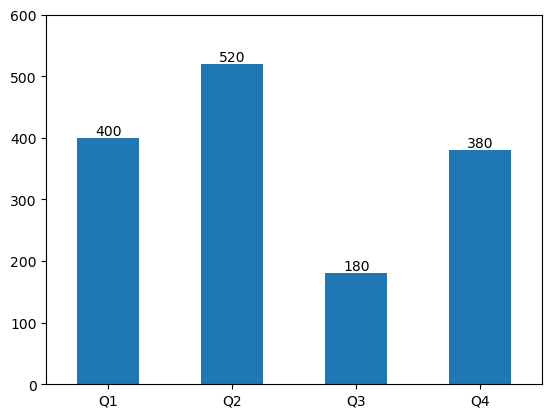

In [42]:
import matplotlib.pyplot as plt

ser9 = pd.Series({'Q1': 400, 'Q2': 520, 'Q3': 180, 'Q4': 380})
# 通过plot方法的kind指定图表类型为柱状图
ser9.plot(kind='bar')
# 定制纵轴的取值范围
plt.ylim(0, 600)
# 定制横轴刻度（旋转到0度）
plt.xticks(rotation=0)
# 为柱子增加数据标签
for i in range(ser9.size):
    plt.text(i, ser9[i] + 5, ser9[i], ha='center')
plt.show()

我们也可以将其绘制为饼图，代码如下所示。

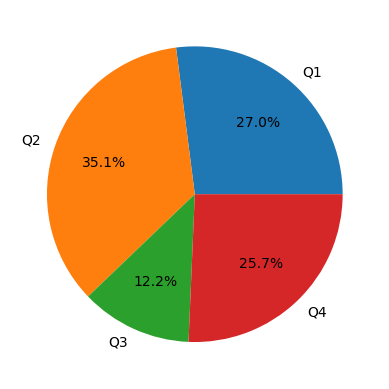

In [43]:
# plot方法的kind参数指定了图表类型为饼图
# autopct会自动计算并显示百分比
# pctdistance用来控制百分比到圆心的距离
ser9.plot(kind='pie', autopct='%.1f%%', pctdistance=0.65)
plt.show()